In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
path='/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/'
#path='/media/WinToUSB/7_counting_transcripts/noncoding_novel/'


# BEGIN // dotyczy:
I am interested in exploring whether there is a difference in the ratio A/B between the two conditions. Just to clarify: I am not interested in finding out whether there are significant differences between A and B (there are), but whether those differences between A and B change between condition treated vs. untreated.

In [3]:
UTR = pd.read_csv(path+'mRNA_only_merged_w_XP.csv')
UTR.head(1)

,query,al_title,al_accession,evalue,coverage,Entry,Protein names,Gene names
0,TRINITY_DN100004_c4_g2_i2,gi|929290304|ref|XM_014166828.1| PREDICTED: Sa...,XM_014166828,0.0,100.183824,A0A1S3P3U9,forkhead box protein P4-like isoform X8,LOC106583051


In [4]:
UTR = UTR[['query', 'Entry']]
UTR.head(1)

,query,Entry
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9


In [5]:
UTR.rename(columns={'query':'trinity'}, inplace=True)

In [6]:
UTR.head(1)

,trinity,Entry
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9


In [8]:
matryca_novel = pd.read_csv(path+'PBS1d_MC_all_matryca.csv')
matryca_novel.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,MC_6d_1,MC_6d_2,MC_6d_3,MC_9d_1,MC_9d_2,MC_9d_3
0,TRINITY_DN100003_c1_g1_i1,8,16,29,1,24,21,24,1,1,2,7,2,34
1,TRINITY_DN100004_c4_g2_i2,9,22,24,8,23,50,45,65,53,95,76,29,74
2,TRINITY_DN100005_c7_g2_i1,800,798,577,913,1322,1276,1285,6952,5736,4279,6616,4073,3119
3,TRINITY_DN100005_c8_g3_i1,101,102,92,248,52,56,71,89,189,138,313,327,278
4,TRINITY_DN100005_c9_g1_i1,19,4,22,4,2,2,1,0,1,0,2,6,18


In [21]:
matryca_novel.shape

(188998, 14)

In [9]:
matryca_w_entry = pd.merge(UTR, matryca_novel, on='trinity', how='inner')
matryca_w_entry.head()

,trinity,Entry,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,MC_6d_1,MC_6d_2,MC_6d_3,MC_9d_1,MC_9d_2,MC_9d_3
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9,9,22,24,8,23,50,45,65,53,95,76,29,74
1,TRINITY_DN100005_c7_g2_i1,A0A1S3SUX9,800,798,577,913,1322,1276,1285,6952,5736,4279,6616,4073,3119
2,TRINITY_DN81030_c8_g4_i1,A0A1S3SUX9,47,44,18,47,62,74,62,335,306,196,292,162,121
3,TRINITY_DN83202_c8_g4_i2,A0A1S3SUX9,35,21,30,30,13,28,32,8,6,13,21,15,38
4,TRINITY_DN105298_c5_g1_i2,A0A1S3SUX9,23,15,19,25,7,12,10,1,13,8,22,8,13


In [9]:
matryca_w_entry.shape #mamy tu tylko trinity zidentyfikowane jako mRNA bialka (UTR)

(93208, 15)

In [10]:
matryca_w_entry.columns = [str(col) + '_UTR' for col in matryca_w_entry.columns]

In [11]:
matryca_w_entry.rename(columns={'Entry_UTR':'Entry', 'trinity_UTR':'id_UTR'}, inplace=True)

In [12]:
matryca_w_entry.head()

,id_UTR,Entry,PBS_1d_1_UTR,PBS_1d_2_UTR,PBS_1d_3_UTR,PBS_1d_4_UTR,MC_1d_1_UTR,MC_1d_2_UTR,MC_1d_3_UTR,MC_6d_1_UTR,MC_6d_2_UTR,MC_6d_3_UTR,MC_9d_1_UTR,MC_9d_2_UTR,MC_9d_3_UTR
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9,9,22,24,8,23,50,45,65,53,95,76,29,74
1,TRINITY_DN100005_c7_g2_i1,A0A1S3SUX9,800,798,577,913,1322,1276,1285,6952,5736,4279,6616,4073,3119
2,TRINITY_DN81030_c8_g4_i1,A0A1S3SUX9,47,44,18,47,62,74,62,335,306,196,292,162,121
3,TRINITY_DN83202_c8_g4_i2,A0A1S3SUX9,35,21,30,30,13,28,32,8,6,13,21,15,38
4,TRINITY_DN105298_c5_g1_i2,A0A1S3SUX9,23,15,19,25,7,12,10,1,13,8,22,8,13


## BIAŁKA PROT

In [13]:
matryca_w_entry.head()

,id_UTR,Entry,PBS_1d_1_UTR,PBS_1d_2_UTR,PBS_1d_3_UTR,PBS_1d_4_UTR,MC_1d_1_UTR,MC_1d_2_UTR,MC_1d_3_UTR,MC_6d_1_UTR,MC_6d_2_UTR,MC_6d_3_UTR,MC_9d_1_UTR,MC_9d_2_UTR,MC_9d_3_UTR
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9,9,22,24,8,23,50,45,65,53,95,76,29,74
1,TRINITY_DN100005_c7_g2_i1,A0A1S3SUX9,800,798,577,913,1322,1276,1285,6952,5736,4279,6616,4073,3119
2,TRINITY_DN81030_c8_g4_i1,A0A1S3SUX9,47,44,18,47,62,74,62,335,306,196,292,162,121
3,TRINITY_DN83202_c8_g4_i2,A0A1S3SUX9,35,21,30,30,13,28,32,8,6,13,21,15,38
4,TRINITY_DN105298_c5_g1_i2,A0A1S3SUX9,23,15,19,25,7,12,10,1,13,8,22,8,13


In [14]:
# BIALKA:

salmo_rep_with_annot = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/1_code/report_salmo_annot_feature_map_salmo_proteins_xp01.csv', sep='\t', low_memory=False)

In [15]:
salmo_rep_with_annot.head()

,id,ident
0,TRINITY_DN100000_c5_g1,XP_013978521.1
1,TRINITY_DN100000_c5_g1_i2,XP_014024532.1
2,TRINITY_DN100000_c5_g1_i6,XP_013978521.1
3,TRINITY_DN100000_c9_g1,NaN
4,TRINITY_DN100000_c9_g1_i1,NaN


In [16]:
salmo_rep_with_annot.shape

(332030, 2)

In [17]:
salmo_rep_with_annot.dropna(inplace=True)
salmo_rep_with_annot.shape

(257125, 2)

In [18]:
salmo_rep_with_annot.head()

,id,ident
0,TRINITY_DN100000_c5_g1,XP_013978521.1
1,TRINITY_DN100000_c5_g1_i2,XP_014024532.1
2,TRINITY_DN100000_c5_g1_i6,XP_013978521.1
7,TRINITY_DN100001_c2_g2,XP_014027367.1
8,TRINITY_DN100001_c2_g2_i2,XP_014027367.1


In [41]:
salmo_rep_with_annot.dtypes

id       object
ident    object
dtype: object

In [52]:
salmo_rep_with_annot['ident'].to_csv(path+'xp_to_uniref.txt', index=False)

In [21]:
# zawiera wszystkie bialka zidentyfikowane przez trinotate i przypisane im Entry z uniprota

uniref_from_trinotate = pd.read_csv(prot_path+'uniprot-yourlist-xp_to_uniref.tab', sep='\t')
uniref_from_trinotate.head()

,Entry,ident,Entry name,Status,Protein names,Gene names,Organism,Length
0,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758
1,A0A1S3PAG0,XP_014024532.1,A0A1S3PAG0_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106584141,Salmo salar (Atlantic salmon),754
2,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333
3,B5X212,XP_014027367.1,CIO1B_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1b,Salmo salar (Atlantic salmon),333
4,A0A1S3NJU9,XP_014015694.1,A0A1S3NJU9_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106579887 CIAO1,Salmo salar (Atlantic salmon),330


In [112]:
#salmo_rep_with_annot_split = pd.DataFrame(salmo_rep_with_annot['ident'].str.split('^').tolist(), index=salmo_rep_with_annot.id).stack()
#salmo_rep_with_annot_split = salmo_rep_with_annot_split.reset_index([0, 'id'])
#salmo_rep_with_annot_split

In [113]:
#uniref_from_trinotate_entry_indent = uniref_from_trinotate[['Entry', 'ident']]
#uniref_from_trinotate_entry_indent.head()

In [22]:
salmo_rep_with_annot_w_entry = pd.merge(uniref_from_trinotate, salmo_rep_with_annot, on='ident', how='inner')
salmo_rep_with_annot_w_entry.head()

,Entry,ident,Entry name,Status,Protein names,Gene names,Organism,Length,id
0,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758,TRINITY_DN100000_c5_g1
1,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758,TRINITY_DN100000_c5_g1_i6
2,A0A1S3PAG0,XP_014024532.1,A0A1S3PAG0_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106584141,Salmo salar (Atlantic salmon),754,TRINITY_DN100000_c5_g1_i2
3,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333,TRINITY_DN100001_c2_g2
4,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333,TRINITY_DN100001_c2_g2_i2


In [23]:
salmo_rep_with_annot_w_entry.shape

(429071, 9)

In [22]:
salmo_rep_with_annot_w_entry.to_csv(prot_path+'PROT_wszystkie_bialka_z_raportu_trinity.csv', index=False)

In [24]:
prot_path = '/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/proteins_salmo/'
proteins_matryca = pd.read_csv(prot_path+'PBS_MCLR_salmo_only_matryca.csv')
proteins_matryca.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,MC_6d_1,MC_6d_2,MC_6d_3,MC_9d_1,MC_9d_2,MC_9d_3
0,TRINITY_DN100000_c5_g1_i2,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0,0,0,5,0,0
1,TRINITY_DN100000_c5_g1_i6,374.0,506.0,607.0,594.0,511.0,726.0,517.0,192,195,227,427,219,339
2,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1730,1743,1974,2315,2067,2386
3,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,402.0,471.0,420.0,1378,1338,1428,1291,1139,1344
4,TRINITY_DN100001_c2_g3_i3,565.0,525.0,384.0,406.0,555.0,552.0,529.0,1553,1461,1684,1436,1416,1447


In [25]:
proteins_matryca.shape

(148647, 14)

In [28]:
proteins_matryca.rename(columns={'trinity':'id'}, inplace=True)

In [29]:
proteins_matryca_w_entry = pd.merge(proteins_matryca, salmo_rep_with_annot_w_entry, on='id', how='inner')
proteins_matryca_w_entry.drop_duplicates(inplace=True)
proteins_matryca_w_entry.shape

(149296, 22)

In [96]:
#proteins_matryca_w_entry.to_csv(path+'test.csv')

In [30]:
test_if_merged_correctly = proteins_matryca_w_entry[~proteins_matryca_w_entry['id'].isin(proteins_matryca['id'])]
test_if_merged_correctly.shape


(0, 22)

In [98]:
#del proteins_matryca_w_entry['id']
#del proteins_matryca_w_entry['ident']

In [31]:
proteins_matryca_w_entry.columns = [str(col) + '_PROT' for col in proteins_matryca_w_entry.columns]

In [32]:
proteins_matryca_w_entry.rename(columns={'Entry_PROT':'Entry'}, inplace=True)

In [33]:
proteins_matryca_w_entry.head()

,id_PROT,PBS_1d_1_PROT,PBS_1d_2_PROT,PBS_1d_3_PROT,PBS_1d_4_PROT,MC_1d_1_PROT,MC_1d_2_PROT,MC_1d_3_PROT,MC_6d_1_PROT,MC_6d_2_PROT,...,MC_9d_2_PROT,MC_9d_3_PROT,Entry,ident_PROT,Entry name_PROT,Status_PROT,Protein names_PROT,Gene names_PROT,Organism_PROT,Length_PROT
0,TRINITY_DN100000_c5_g1_i2,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0,0,...,0,0,A0A1S3PAG0,XP_014024532.1,A0A1S3PAG0_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106584141,Salmo salar (Atlantic salmon),754
1,TRINITY_DN100000_c5_g1_i6,374.0,506.0,607.0,594.0,511.0,726.0,517.0,192,195,...,219,339,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758
2,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1730,1743,...,2067,2386,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333
3,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1730,1743,...,2067,2386,B5X212,XP_014027367.1,CIO1B_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1b,Salmo salar (Atlantic salmon),333
4,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,402.0,471.0,420.0,1378,1338,...,1139,1344,A0A1S3NJU9,XP_014015694.1,A0A1S3NJU9_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106579887 CIAO1,Salmo salar (Atlantic salmon),330


In [34]:
matryca_w_entry.shape #UTR

(93208, 15)

In [35]:
proteins_matryca_w_entry.shape #PROT

(149296, 22)

In [36]:
# do UTR dodac PROT

merged_UTR_PROT_matryca = pd.merge(matryca_w_entry, proteins_matryca_w_entry, on="Entry", how='inner')
#merged.to_csv(path+'matryca_UTR_PROT_entry_only.csv', index=False)

In [37]:
merged_UTR_PROT_matryca.columns

Index(['id_UTR', 'Entry', 'PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR',
       'PBS_1d_4_UTR', 'MC_1d_1_UTR', 'MC_1d_2_UTR', 'MC_1d_3_UTR',
       'MC_6d_1_UTR', 'MC_6d_2_UTR', 'MC_6d_3_UTR', 'MC_9d_1_UTR',
       'MC_9d_2_UTR', 'MC_9d_3_UTR', 'id_PROT', 'PBS_1d_1_PROT',
       'PBS_1d_2_PROT', 'PBS_1d_3_PROT', 'PBS_1d_4_PROT', 'MC_1d_1_PROT',
       'MC_1d_2_PROT', 'MC_1d_3_PROT', 'MC_6d_1_PROT', 'MC_6d_2_PROT',
       'MC_6d_3_PROT', 'MC_9d_1_PROT', 'MC_9d_2_PROT', 'MC_9d_3_PROT',
       'ident_PROT', 'Entry name_PROT', 'Status_PROT', 'Protein names_PROT',
       'Gene names_PROT', 'Organism_PROT', 'Length_PROT'],
      dtype='object')

In [50]:
day_1_matryca = merged_UTR_PROT_matryca[['PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR', 'PBS_1d_4_UTR',
       'MC_1d_1_UTR', 'MC_1d_2_UTR', 'MC_1d_3_UTR', 'PBS_1d_1_PROT', 'PBS_1d_2_PROT',
       'PBS_1d_3_PROT', 'PBS_1d_4_PROT', 'MC_1d_1_PROT', 'MC_1d_2_PROT',
       'MC_1d_3_PROT']]

day_1_matryca.to_csv(path+'day_1_UTR_PROT_matryca.csv', index=False)

# na podstawie powyzszego ^^ robiebie deseq2

In [49]:
day_6_matryca = merged_UTR_PROT_matryca[['PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR', 'PBS_1d_4_UTR',
       'MC_6d_1_UTR', 'MC_6d_2_UTR', 'MC_6d_3_UTR', 'PBS_1d_1_PROT', 'PBS_1d_2_PROT',
       'PBS_1d_3_PROT', 'PBS_1d_4_PROT', 'MC_6d_1_PROT', 'MC_6d_2_PROT',
       'MC_6d_3_PROT']]

day_6_matryca.to_csv(path+'day_6_UTR_PROT_matryca.csv', index=False)

# na podstawie powyzszego ^^ robiebie deseq2

In [48]:
day_9_matryca = merged_UTR_PROT_matryca[['PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR', 'PBS_1d_4_UTR',
       'MC_9d_1_UTR', 'MC_9d_2_UTR', 'MC_9d_3_UTR', 'PBS_1d_1_PROT', 'PBS_1d_2_PROT',
       'PBS_1d_3_PROT', 'PBS_1d_4_PROT', 'MC_9d_1_PROT', 'MC_9d_2_PROT',
       'MC_9d_3_PROT']]

day_9_matryca.to_csv(path+'day_9_UTR_PROT_matryca.csv', index=False)

# na podstawie powyzszego ^^ robiebie deseq2

In [39]:
# ponizej wczytuje wyniki deseq i dodaje do nich kolumny z merged_UTR_PROT_matryca

deseq_day_1_results = pd.read_csv(path+'deseq2_result_from_R_1d.csv')

In [51]:
# ponizej wczytuje wyniki deseq i dodaje do nich kolumny z merged_UTR_PROT_matryca

deseq_day_6_results = pd.read_csv(path+'deseq2_result_from_R_6d.csv')

In [61]:
# ponizej wczytuje wyniki deseq i dodaje do nich kolumny z merged_UTR_PROT_matryca

deseq_day_9_results = pd.read_csv(path+'deseq2_result_from_R_9d.csv')

In [52]:
merged_UTR_PROT_matryca.shape

(295223, 36)

In [183]:
deseq_day_1_results.shape

(295223, 6)

In [53]:
deseq_day_6_results.shape

(295223, 6)

In [41]:
deseq_day_1_results_w_all_details = pd.merge(deseq_day_1_results, merged_UTR_PROT_matryca, left_index=True, right_index=True)
deseq_day_1_results_w_all_details.shape

(295223, 42)

In [54]:
deseq_day_6_results_w_all_details = pd.merge(deseq_day_6_results, merged_UTR_PROT_matryca, left_index=True, right_index=True)
deseq_day_6_results_w_all_details.shape

(295223, 42)

In [62]:
deseq_day_9_results_w_all_details = pd.merge(deseq_day_9_results, merged_UTR_PROT_matryca, left_index=True, right_index=True)
deseq_day_9_results_w_all_details.shape

(295223, 42)

In [42]:
deseq_day_1_results_w_all_details = deseq_day_1_results_w_all_details[['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
       'Entry', 'PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR', 'PBS_1d_4_UTR',
       'MC_1d_1_UTR', 'MC_1d_2_UTR', 'MC_1d_3_UTR', 'id_UTR', 'id_PROT', 'PBS_1d_1_PROT', 'PBS_1d_2_PROT',
       'PBS_1d_3_PROT', 'PBS_1d_4_PROT', 'MC_1d_1_PROT', 'MC_1d_2_PROT',
       'MC_1d_3_PROT', 'ident_PROT', 'Entry name_PROT', 'Status_PROT', 'Protein names_PROT',
       'Gene names_PROT', 'Organism_PROT', 'Length_PROT']]

In [56]:
deseq_day_6_results_w_all_details = deseq_day_6_results_w_all_details[['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
       'Entry', 'PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR', 'PBS_1d_4_UTR',
       'MC_6d_1_UTR', 'MC_6d_2_UTR', 'MC_6d_3_UTR', 'id_UTR', 'id_PROT', 'PBS_1d_1_PROT', 'PBS_1d_2_PROT',
       'PBS_1d_3_PROT', 'PBS_1d_4_PROT', 'MC_6d_1_PROT', 'MC_6d_2_PROT',
       'MC_6d_3_PROT', 'ident_PROT', 'Entry name_PROT', 'Status_PROT', 'Protein names_PROT',
       'Gene names_PROT', 'Organism_PROT', 'Length_PROT']]

In [63]:
deseq_day_9_results_w_all_details = deseq_day_9_results_w_all_details[['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
       'Entry', 'PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR', 'PBS_1d_4_UTR',
       'MC_9d_1_UTR', 'MC_9d_2_UTR', 'MC_9d_3_UTR', 'id_UTR', 'id_PROT', 'PBS_1d_1_PROT', 'PBS_1d_2_PROT',
       'PBS_1d_3_PROT', 'PBS_1d_4_PROT', 'MC_9d_1_PROT', 'MC_9d_2_PROT',
       'MC_9d_3_PROT', 'ident_PROT', 'Entry name_PROT', 'Status_PROT', 'Protein names_PROT',
       'Gene names_PROT', 'Organism_PROT', 'Length_PROT']]

In [43]:
deseq_day_1_results_w_all_details = deseq_day_1_results_w_all_details[deseq_day_1_results_w_all_details['padj'] < 0.001]

In [57]:
deseq_day_6_results_w_all_details = deseq_day_6_results_w_all_details[deseq_day_6_results_w_all_details['padj'] < 0.001]

In [64]:
deseq_day_9_results_w_all_details = deseq_day_9_results_w_all_details[deseq_day_9_results_w_all_details['padj'] < 0.001]

In [44]:
deseq_day_1_results_w_all_details.sort_values(by='log2FoldChange', inplace=True)

In [58]:
deseq_day_6_results_w_all_details.sort_values(by='log2FoldChange', inplace=True)

In [65]:
deseq_day_9_results_w_all_details.sort_values(by='log2FoldChange', inplace=True)

In [188]:
#deseq_day_1_results_w_all_details.to_csv(path+'deseq_result_1d_with_all_details.csv', index=False)


In [104]:
# stosunek PROT/UTR był większy w MCLR
deseq_day_1_results_w_all_details[deseq_day_1_results_w_all_details['log2FoldChange'] < 1].shape

(5543, 30)

In [103]:
# stosunek PROT/UTR był większy w PBS
deseq_day_1_results_w_all_details[deseq_day_1_results_w_all_details['log2FoldChange'] > 1].shape

(4292, 30)

In [59]:
# stosunek PROT/UTR był większy w MCLR
deseq_day_6_results_w_all_details[deseq_day_6_results_w_all_details['log2FoldChange'] < 1].shape

(23839, 30)

In [60]:
# stosunek PROT/UTR był większy w PBS
deseq_day_6_results_w_all_details[deseq_day_6_results_w_all_details['log2FoldChange'] > 1].shape

(16041, 30)

In [66]:
# stosunek PROT/UTR był większy w MCLR
deseq_day_9_results_w_all_details[deseq_day_9_results_w_all_details['log2FoldChange'] < 1].shape

(16626, 30)

In [67]:
# stosunek PROT/UTR był większy w PBS
deseq_day_9_results_w_all_details[deseq_day_9_results_w_all_details['log2FoldChange'] > 1].shape

(10327, 30)

In [127]:
# redBars =  ilosc par, gdzie stosunek PROT/UTR jest większy w MCLR niż w PBS
# blueBars = ilosc par, gdzie stosunek PROT/UTR jest większy w PBS niż w MCLR



# Data
r = [0,1,2]
raw_data = {'redBars': [5543, 23839, 16626], 'blueBars': [4292, 16041, 10327]}
df = pd.DataFrame(raw_data)
df

,redBars,blueBars
0,5543,4292
1,23839,16041
2,16626,10327


In [128]:
# From raw value to percentage
totals = [i+j for i,j in zip(df['blueBars'], df['redBars'])]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]

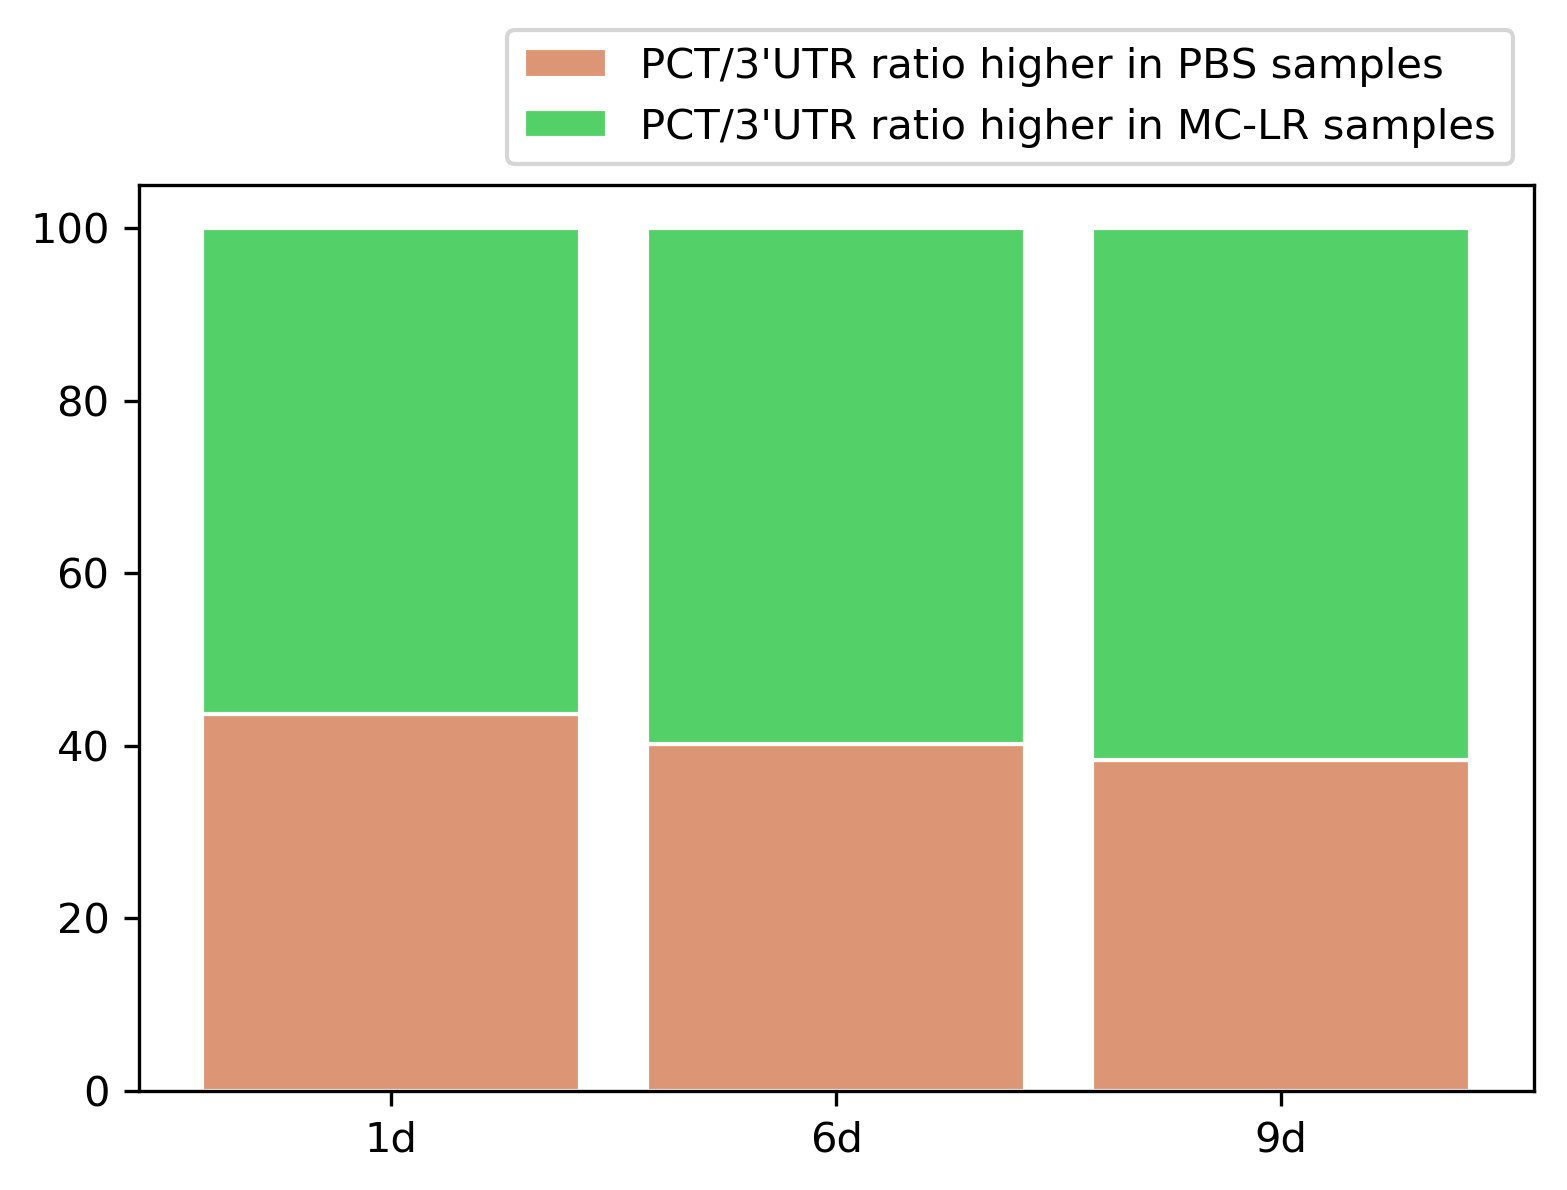

In [131]:
# plot
plt.figure(dpi=300)
barWidth = 0.85
names = ('1d','6d','9d')
# Create Bars
plt.bar(r, blueBars, color='#dd9675', edgecolor='white', width=barWidth, label="PCT/3'UTR ratio higher in PBS samples")
# Create Bars
plt.bar(r, redBars, bottom=blueBars, color='#53d168', edgecolor='white', width=barWidth, label="PCT/3'UTR ratio higher in MC-LR samples")
# Create blue Bars
#plt.bar(r, greenBars, bottom=[i+j for i,j in zip(blueBars, orangeBars)], color='#53d168', edgecolor='white', width=barWidth, label='UTR ↓ PROT ↑')
# Create red Bars
#plt.bar(r, redBars, bottom=[i+j+k for i,j,k in zip(blueBars, orangeBars, greenBars)], color='#d15360', edgecolor='white', width=barWidth, label='UTR ↑ PROT ↑')

# Custom x axis
plt.xticks(r, names)
plt.legend(loc='lower right', bbox_to_anchor=(1,1), ncol=1)

# END ///// dotyczy:
I am interested in exploring whether there is a difference in the ratio A/B between the two conditions. Just to clarify: I am not interested in finding out whether there are significant differences between A and B (there are), but whether those differences between A and B change between condition treated vs. untreated.

# BEGIN /// 
### deseq UTR i PROT oddzielnie i porownanie ze soba juz tylko wynikow log2fc

najpierw: deseq wszystkich sekwencji (matryca novel), a potem wybranie z nich mRNA

## UTR

In [3]:
matryca_novel = pd.read_csv(path+'PBS1d_MC_all_matryca.csv')
matryca_novel.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,MC_6d_1,MC_6d_2,MC_6d_3,MC_9d_1,MC_9d_2,MC_9d_3
0,TRINITY_DN100003_c1_g1_i1,8,16,29,1,24,21,24,1,1,2,7,2,34
1,TRINITY_DN100004_c4_g2_i2,9,22,24,8,23,50,45,65,53,95,76,29,74
2,TRINITY_DN100005_c7_g2_i1,800,798,577,913,1322,1276,1285,6952,5736,4279,6616,4073,3119
3,TRINITY_DN100005_c8_g3_i1,101,102,92,248,52,56,71,89,189,138,313,327,278
4,TRINITY_DN100005_c9_g1_i1,19,4,22,4,2,2,1,0,1,0,2,6,18


In [5]:
matryca_novel.shape

(188998, 14)

In [8]:
#matryca_novel.to_csv(path+'matryca.csv', index=False)

In [6]:
matryca_novel.columns

Index(['trinity', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_1d_1',
       'MC_1d_2', 'MC_1d_3', 'MC_6d_1', 'MC_6d_2', 'MC_6d_3', 'MC_9d_1',
       'MC_9d_2', 'MC_9d_3'],
      dtype='object')

In [4]:
matryca_novel_1d = matryca_novel[['trinity', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_1d_1',
       'MC_1d_2', 'MC_1d_3']]

In [5]:
matryca_novel_6d = matryca_novel[['trinity', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_6d_1',
       'MC_6d_2', 'MC_6d_3']]

In [6]:
matryca_novel_9d = matryca_novel[['trinity', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_9d_1',
       'MC_9d_2', 'MC_9d_3']]

In [7]:
# po deseq2:

#zaladuj wyniki deseq
novel_deseq_results_d1 = pd.read_csv(path+'NOVEL_deseq2_result_from_R_1d.csv')

In [8]:
# po deseq2:

#zaladuj wyniki deseq
novel_deseq_results_d6 = pd.read_csv(path+'NOVEL_deseq2_result_from_R_6d.csv')

In [9]:
# po deseq2:

#zaladuj wyniki deseq
novel_deseq_results_d9 = pd.read_csv(path+'NOVEL_deseq2_result_from_R_9d.csv')

In [10]:
# dodaj kolumny trinity oraz RC poszczegolnych grup do wynikow deseq:
novel_deseq_results_d1 = pd.concat([matryca_novel_1d, novel_deseq_results_d1], axis=1, sort=False)

In [11]:
# dodaj kolumny trinity oraz RC poszczegolnych grup do wynikow deseq:
novel_deseq_results_d6 = pd.concat([matryca_novel_6d, novel_deseq_results_d6], axis=1, sort=False)

In [12]:
# dodaj kolumny trinity oraz RC poszczegolnych grup do wynikow deseq:
novel_deseq_results_d9 = pd.concat([matryca_novel_9d, novel_deseq_results_d9], axis=1, sort=False)

In [14]:
novel_deseq_results_d1.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/RNAhybrid_PB/novel_deseq_results_d1_w_names.csv', index=False)
novel_deseq_results_d6.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/RNAhybrid_PB/novel_deseq_results_d6_w_names.csv', index=False)
novel_deseq_results_d9.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/RNAhybrid_PB/novel_deseq_results_d9_w_names.csv', index=False)

In [16]:
novel_deseq_results_d6.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_6d_1,MC_6d_2,MC_6d_3,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,TRINITY_DN100003_c1_g1_i1,8,16,29,1,1,1,2,8.647723,3.567641,1.264339,2.821744,4.776327e-03,1.574062e-02
1,TRINITY_DN100004_c4_g2_i2,9,22,24,8,65,53,95,36.647454,-1.964039,0.585174,-3.356333,7.898353e-04,3.335817e-03
2,TRINITY_DN100005_c7_g2_i1,800,798,577,913,6952,5736,4279,2618.091776,-2.670724,0.307136,-8.695573,3.450849e-18,1.467592e-16
3,TRINITY_DN100005_c8_g3_i1,101,102,92,248,89,189,138,132.894253,0.134057,0.491740,0.272617,7.851474e-01,8.563848e-01
4,TRINITY_DN100005_c9_g1_i1,19,4,22,4,0,1,0,7.587604,5.339327,1.586008,3.366519,7.612343e-04,3.229865e-03


In [17]:
novel_deseq_results_d1 = novel_deseq_results_d1[novel_deseq_results_d1['padj'] < 0.001]

In [18]:
novel_deseq_results_d1.sort_values(by='log2FoldChange', inplace=True)

In [19]:
novel_deseq_results_d6 = novel_deseq_results_d6[novel_deseq_results_d6['padj'] < 0.001]

In [20]:
novel_deseq_results_d6.sort_values(by='log2FoldChange', inplace=True)

In [21]:
novel_deseq_results_d9 = novel_deseq_results_d9[novel_deseq_results_d9['padj'] < 0.001]

In [22]:
novel_deseq_results_d9.sort_values(by='log2FoldChange', inplace=True)

In [23]:
#novel_deseq_results_d1.to_csv(path+'NOVEL_deseq2_result_from_R_1d_padj-filtered_l2fc-sorted.csv', index=False)

In [24]:
# filtrowanie tylko mRNA UTR ze wszystkich trinity, ktore to zawiera powyzsza matryca

In [25]:
UTR = pd.read_csv(path+'mRNA_only_merged_w_XP.csv')
UTR.head(1)

,query,al_title,al_accession,evalue,coverage,Entry,Protein names,Gene names
0,TRINITY_DN100004_c4_g2_i2,gi|929290304|ref|XM_014166828.1| PREDICTED: Sa...,XM_014166828,0.0,100.183824,A0A1S3P3U9,forkhead box protein P4-like isoform X8,LOC106583051


In [26]:
UTR = UTR[['query', 'Entry', 'Protein names']]
UTR.head(1)

,query,Entry,Protein names
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9,forkhead box protein P4-like isoform X8


In [27]:
UTR.rename(columns={'query':'trinity'}, inplace=True)

In [28]:
UTR.head(1)

,trinity,Entry,Protein names
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9,forkhead box protein P4-like isoform X8


In [29]:
mRNA_deseq_results_d1 = pd.merge(UTR, novel_deseq_results_d1, on='trinity', how='inner')
mRNA_deseq_results_d1.head(1)

,trinity,Entry,Protein names,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,TRINITY_DN91961_c5_g1_i1,A0A1S3SUX9,"alpha-N-acetylgalactosaminide alpha-2,6-sialyl...",42,64,60,68,10,6,1,33.540847,3.280342,0.66513,4.931881,8.144168e-07,0.000029


In [30]:
mRNA_deseq_results_d6 = pd.merge(UTR, novel_deseq_results_d6, on='trinity', how='inner')
mRNA_deseq_results_d6.head()

,trinity,Entry,Protein names,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_6d_1,MC_6d_2,MC_6d_3,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,TRINITY_DN100005_c7_g2_i1,A0A1S3SUX9,"alpha-N-acetylgalactosaminide alpha-2,6-sialyl...",800,798,577,913,6952,5736,4279,2618.091776,-2.670724,0.307136,-8.695573,3.450849e-18,1.467592e-16
1,TRINITY_DN81030_c8_g4_i1,A0A1S3SUX9,"alpha-N-acetylgalactosaminide alpha-2,6-sialyl...",47,44,18,47,335,306,196,129.781644,-2.641497,0.439643,-6.008272,1.875112e-09,2.526779e-08
2,TRINITY_DN91961_c5_g1_i1,A0A1S3SUX9,"alpha-N-acetylgalactosaminide alpha-2,6-sialyl...",42,64,60,68,23,11,20,41.196033,1.906889,0.480516,3.968417,7.235165e-05,4.019874e-04
3,TRINITY_DN110347_c4_g1_i2,A0A1S3RIW2,voltage-gated potassium channel subunit beta-2...,1246,1439,1081,1869,31,44,18,836.502647,5.692265,0.399390,14.252386,4.332227e-46,2.223654e-43
4,TRINITY_DN112735_c14_g1_i2,A0A1S3RIW2,voltage-gated potassium channel subunit beta-2...,43,105,32,14,0,0,0,28.446333,8.237318,1.413710,5.826737,5.652159e-09,7.068642e-08


In [31]:
mRNA_deseq_results_d9 = pd.merge(UTR, novel_deseq_results_d9, on='trinity', how='inner')
mRNA_deseq_results_d9.head()

,trinity,Entry,Protein names,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_9d_1,MC_9d_2,MC_9d_3,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,TRINITY_DN100005_c7_g2_i1,A0A1S3SUX9,"alpha-N-acetylgalactosaminide alpha-2,6-sialyl...",800,798,577,913,6616,4073,3119,2050.110876,-2.022177,0.408863,-4.945852,7.581172e-07,1.101775e-05
1,TRINITY_DN110347_c4_g1_i2,A0A1S3RIW2,voltage-gated potassium channel subunit beta-2...,1246,1439,1081,1869,32,11,255,953.007779,4.455068,0.804014,5.541031,3.006951e-08,6.254534e-07
2,TRINITY_DN81835_c7_g1_i1,A0A1S3RIW2,voltage-gated potassium channel subunit beta-2...,1686,2005,1513,2852,53,32,339,1360.091690,4.452888,0.708102,6.288481,3.205872e-10,1.069100e-08
3,TRINITY_DN86495_c7_g1_i7,C0HBG6,Ras-related and estrogen-regulated growth inhi...,11,15,7,21,69,263,241,71.252965,-3.245441,0.617382,-5.256778,1.466009e-07,2.568730e-06
4,TRINITY_DN100021_c4_g1_i2,A0A1B1PFD7,NFAT5a2 (nuclear factor of activated T-cells 5...,40,53,36,18,178,197,209,88.715668,-1.816671,0.473409,-3.837425,1.243310e-04,9.341171e-04


In [32]:
#mamy tu wynik deseq 1d dla UTR (zidentyfikowane jako mRNA w blast'cie)
#deseq robiony w R
#teraz wystarczy zrobic jeszcze deseq dla 1d bialek prawdziwych (;)) i porownac je po entry z tymi tu UTR'ami
mRNA_deseq_results_d1.shape 

(3010, 16)

In [33]:
mRNA_deseq_results_d1[mRNA_deseq_results_d1['log2FoldChange'] > 1].shape

(1337, 16)

In [34]:
mRNA_deseq_results_d1[mRNA_deseq_results_d1['log2FoldChange'] < 1].shape

(1673, 16)

In [35]:
mRNA_deseq_results_d6.shape

(14158, 16)

In [36]:
mRNA_deseq_results_d6[mRNA_deseq_results_d6['log2FoldChange'] > 1].shape

(6894, 16)

In [37]:
mRNA_deseq_results_d6[mRNA_deseq_results_d6['log2FoldChange'] < 1].shape

(7264, 16)

In [38]:
mRNA_deseq_results_d9.shape

(10038, 16)

In [39]:
mRNA_deseq_results_d9[mRNA_deseq_results_d9['log2FoldChange'] > 1].shape

(4293, 16)

In [40]:
mRNA_deseq_results_d9[mRNA_deseq_results_d9['log2FoldChange'] < 1].shape

(5745, 16)

In [41]:
mRNA_deseq_results_d9.drop_duplicates(inplace=True)
mRNA_deseq_results_d9.shape

(10038, 16)

## PROT

In [42]:
prot_path='/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/proteins_salmo/'

In [43]:
matryca_salmo_prot = pd.read_csv(prot_path+'PBS_MCLR_salmo_only_matryca.csv')
matryca_salmo_prot.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,MC_6d_1,MC_6d_2,MC_6d_3,MC_9d_1,MC_9d_2,MC_9d_3
0,TRINITY_DN100000_c5_g1_i2,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0,0,0,5,0,0
1,TRINITY_DN100000_c5_g1_i6,374.0,506.0,607.0,594.0,511.0,726.0,517.0,192,195,227,427,219,339
2,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1730,1743,1974,2315,2067,2386
3,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,402.0,471.0,420.0,1378,1338,1428,1291,1139,1344
4,TRINITY_DN100001_c2_g3_i3,565.0,525.0,384.0,406.0,555.0,552.0,529.0,1553,1461,1684,1436,1416,1447


In [44]:
matryca_salmo_prot_1d = matryca_salmo_prot[['trinity', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_1d_1',
       'MC_1d_2', 'MC_1d_3']]

In [45]:
matryca_salmo_prot_6d = matryca_salmo_prot[['trinity', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_6d_1',
       'MC_6d_2', 'MC_6d_3']]

In [46]:
matryca_salmo_prot_9d = matryca_salmo_prot[['trinity', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_9d_1',
       'MC_9d_2', 'MC_9d_3']]

In [47]:
# deseq wszystkich bialek

In [48]:
# po deseq2:

#zaladuj wyniki deseq
prot_deseq_results_d1 = pd.read_csv(prot_path+'PROT_deseq2_result_from_R_1d.csv')

In [49]:
# po deseq2:

#zaladuj wyniki deseq
prot_deseq_results_d6 = pd.read_csv(prot_path+'PROT_deseq2_result_from_R_6d.csv')

In [50]:
# po deseq2:

#zaladuj wyniki deseq
prot_deseq_results_d9 = pd.read_csv(prot_path+'PROT_deseq2_result_from_R_9d.csv')

In [51]:
# dodaj kolumny trinity oraz RC poszczegolnych grup do wynikow deseq:
prot_deseq_results_d1 = pd.concat([matryca_salmo_prot_1d, prot_deseq_results_d1], axis=1, sort=False)

In [52]:
# dodaj kolumny trinity oraz RC poszczegolnych grup do wynikow deseq:
prot_deseq_results_d6 = pd.concat([matryca_salmo_prot_6d, prot_deseq_results_d6], axis=1, sort=False)

In [53]:
# dodaj kolumny trinity oraz RC poszczegolnych grup do wynikow deseq:
prot_deseq_results_d9 = pd.concat([matryca_salmo_prot_9d, prot_deseq_results_d9], axis=1, sort=False)

In [54]:
prot_deseq_results_d1.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,TRINITY_DN100000_c5_g1_i2,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.749348,2.942381,3.733119,0.788183,0.430590,NaN
1,TRINITY_DN100000_c5_g1_i6,374.0,506.0,607.0,594.0,511.0,726.0,517.0,536.444545,0.003718,0.298455,0.012459,0.990060,0.996488
2,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1160.929051,-0.011349,0.227672,-0.049846,0.960245,0.984625
3,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,402.0,471.0,420.0,408.751557,0.054736,0.284350,0.192495,0.847354,0.935092
4,TRINITY_DN100001_c2_g3_i3,565.0,525.0,384.0,406.0,555.0,552.0,529.0,491.319090,-0.085350,0.253452,-0.336748,0.736307,0.880355


In [55]:
# dodanie "Entry bialek (i reszty informacji o bialkach z raportu trinity)" do matrycy z wynikami deseq
# plik importowany ponizej pochodzi z sekcji na samej gorze.

In [56]:
prot_all_from_trinity_report = pd.read_csv(prot_path+'PROT_wszystkie_bialka_z_raportu_trinity.csv')
prot_all_from_trinity_report.head(1)

,Entry,ident,Entry name,Status,Protein names,Gene names,Organism,Length,id
0,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758,TRINITY_DN100000_c5_g1


In [57]:
prot_all_from_trinity_report.rename(columns={'id':'trinity'}, inplace=True)

In [58]:
prot_deseq_results_d1_merged_prot_details = pd.merge(prot_deseq_results_d1, prot_all_from_trinity_report, on='trinity', how='inner')
prot_deseq_results_d1_merged_prot_details

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,baseMean,log2FoldChange,...,pvalue,padj,Entry,ident,Entry name,Status,Protein names,Gene names,Organism,Length
0,TRINITY_DN100000_c5_g1_i2,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.749348,2.942381,...,4.305896e-01,NaN,A0A1S3PAG0,XP_014024532.1,A0A1S3PAG0_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106584141,Salmo salar (Atlantic salmon),754
1,TRINITY_DN100000_c5_g1_i6,374.0,506.0,607.0,594.0,511.0,726.0,517.0,536.444545,0.003718,...,9.900598e-01,9.964880e-01,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758
2,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1160.929051,-0.011349,...,9.602448e-01,9.846255e-01,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333
3,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1160.929051,-0.011349,...,9.602448e-01,9.846255e-01,B5X212,XP_014027367.1,CIO1B_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1b,Salmo salar (Atlantic salmon),333
4,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,402.0,471.0,420.0,408.751557,0.054736,...,8.473543e-01,9.350916e-01,A0A1S3NJU9,XP_014015694.1,A0A1S3NJU9_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106579887 CIAO1,Salmo salar (Atlantic salmon),330
5,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,402.0,471.0,420.0,408.751557,0.054736,...,8.473543e-01,9.350916e-01,B5X9P2,XP_014015694.1,CIO1A_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1a,Salmo salar (Atlantic salmon),330
6,TRINITY_DN100001_c2_g3_i3,565.0,525.0,384.0,406.0,555.0,552.0,529.0,491.319090,-0.085350,...,7.363066e-01,8.803554e-01,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333
7,TRINITY_DN100001_c2_g3_i3,565.0,525.0,384.0,406.0,555.0,552.0,529.0,491.319090,-0.085350,...,7.363066e-01,8.803554e-01,B5X212,XP_014027367.1,CIO1B_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1b,Salmo salar (Atlantic salmon),333
8,TRINITY_DN100001_c2_g5_i1,408.0,396.0,299.0,269.0,322.0,336.0,303.0,327.589884,0.235980,...,3.828576e-01,6.413399e-01,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333
9,TRINITY_DN100001_c2_g5_i1,408.0,396.0,299.0,269.0,322.0,336.0,303.0,327.589884,0.235980,...,3.828576e-01,6.413399e-01,B5X212,XP_014027367.1,CIO1B_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1b,Salmo salar (Atlantic salmon),333


In [59]:
prot_deseq_results_d6_merged_prot_details = pd.merge(prot_deseq_results_d6, prot_all_from_trinity_report, on='trinity', how='inner')
prot_deseq_results_d6_merged_prot_details.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_6d_1,MC_6d_2,MC_6d_3,baseMean,log2FoldChange,...,pvalue,padj,Entry,ident,Entry name,Status,Protein names,Gene names,Organism,Length
0,TRINITY_DN100000_c5_g1_i2,0.0,3.0,2.0,0.0,0,0,0,0.801119,3.158985,...,3.803443e-01,NaN,A0A1S3PAG0,XP_014024532.1,A0A1S3PAG0_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106584141,Salmo salar (Atlantic salmon),754
1,TRINITY_DN100000_c5_g1_i6,374.0,506.0,607.0,594.0,192,195,227,400.698424,1.716315,...,1.049519e-08,6.674162e-08,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758
2,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1730,1743,1974,1365.742759,-0.324285,...,1.151943e-01,1.869944e-01,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333
3,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1730,1743,1974,1365.742759,-0.324285,...,1.151943e-01,1.869944e-01,B5X212,XP_014027367.1,CIO1B_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1b,Salmo salar (Atlantic salmon),333
4,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,1378,1338,1428,757.811676,-1.412238,...,3.941772e-07,2.029290e-06,A0A1S3NJU9,XP_014015694.1,A0A1S3NJU9_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106579887 CIAO1,Salmo salar (Atlantic salmon),330


In [60]:
prot_deseq_results_d9_merged_prot_details = pd.merge(prot_deseq_results_d9, prot_all_from_trinity_report, on='trinity', how='inner')
prot_deseq_results_d9_merged_prot_details.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_9d_1,MC_9d_2,MC_9d_3,baseMean,log2FoldChange,...,pvalue,padj,Entry,ident,Entry name,Status,Protein names,Gene names,Organism,Length
0,TRINITY_DN100000_c5_g1_i2,0.0,3.0,2.0,0.0,5,0,0,1.393534,0.327664,...,0.902632,0.937984,A0A1S3PAG0,XP_014024532.1,A0A1S3PAG0_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106584141,Salmo salar (Atlantic salmon),754
1,TRINITY_DN100000_c5_g1_i6,374.0,506.0,607.0,594.0,427,219,339,460.552239,1.339117,...,0.000140,0.000620,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758
2,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,2315,2067,2386,1496.687824,-0.344909,...,0.071911,0.139669,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333
3,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,2315,2067,2386,1496.687824,-0.344909,...,0.071911,0.139669,B5X212,XP_014027367.1,CIO1B_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1b,Salmo salar (Atlantic salmon),333
4,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,1291,1139,1344,682.067860,-0.980119,...,0.000353,0.001414,A0A1S3NJU9,XP_014015694.1,A0A1S3NJU9_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106579887 CIAO1,Salmo salar (Atlantic salmon),330


In [61]:
prot_deseq_results_d1_merged_prot_details.shape

(246795, 22)

In [62]:
prot_deseq_results_d6_merged_prot_details.shape

(246795, 22)

In [63]:
prot_deseq_results_d9_merged_prot_details.shape

(246795, 22)

In [64]:
prot_deseq_results_d1_merged_prot_details = prot_deseq_results_d1_merged_prot_details[prot_deseq_results_d1_merged_prot_details['padj'] < 0.001]

In [65]:
prot_deseq_results_d6_merged_prot_details = prot_deseq_results_d6_merged_prot_details[prot_deseq_results_d6_merged_prot_details['padj'] < 0.001]

In [66]:
prot_deseq_results_d9_merged_prot_details = prot_deseq_results_d9_merged_prot_details[prot_deseq_results_d9_merged_prot_details['padj'] < 0.001]

In [67]:
prot_deseq_results_d1_merged_prot_details.sort_values(by='log2FoldChange', inplace=True)

/home/maciek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
prot_deseq_results_d6_merged_prot_details.sort_values(by='log2FoldChange', inplace=True)

In [69]:
prot_deseq_results_d9_merged_prot_details.sort_values(by='log2FoldChange', inplace=True)

In [70]:
prot_deseq_results_d1_merged_prot_details.drop_duplicates(inplace=True)
prot_deseq_results_d1_merged_prot_details.shape

/home/maciek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(7419, 22)

In [71]:
prot_deseq_results_d6_merged_prot_details.drop_duplicates(inplace=True)
prot_deseq_results_d6_merged_prot_details.shape

(37964, 22)

In [72]:
prot_deseq_results_d9_merged_prot_details.drop_duplicates(inplace=True)
prot_deseq_results_d9_merged_prot_details.shape

(28874, 22)

## UTR / PROT

## D1

In [73]:
merged = pd.merge(mRNA_deseq_results_d1, prot_deseq_results_d1_merged_prot_details, on='Entry', how='inner', suffixes=('_UTR', '_PROT'))
merged.shape

(1874, 37)

In [74]:
#merged.to_csv(prot_path+'testowo.csv', index=False) 

In [75]:
merged.drop_duplicates(inplace=True)
merged.shape

(1874, 37)

In [76]:
# zestawienie L2FC w droch grupach, obejmuje tylko grupy ktore sie zmienily, tzn nie ma tu takich
# ktore zmianom nie ulegly, np. UTR_UP i PROT_NONE (up po MC w UTR, ale w bialkach bez zmiany)
# zeby to zrobic musze porownac 

In [77]:
UTR_UP_PROT_UP = merged[(merged['log2FoldChange_UTR'] < 0) & (merged['log2FoldChange_PROT'] < 0)]

In [78]:
UTR_UP_PROT_DOWN = merged[(merged['log2FoldChange_UTR'] < 0) & (merged['log2FoldChange_PROT'] > 0)]

In [79]:
UTR_DOWN_PROT_UP = merged[(merged['log2FoldChange_UTR'] > 0) & (merged['log2FoldChange_PROT'] < 0)] 

In [80]:
UTR_DOWN_PROT_DOWN = merged[(merged['log2FoldChange_UTR'] > 0) & (merged['log2FoldChange_PROT'] > 0)] 

In [81]:
# ponizsze, zgodnie ze znakami: w deseq mam znaki odwrotnie, tzn, jesli po MC jest wzrost to mam znak "-"
# i dlatego UP ma znak '<'

In [82]:
UTR_UP_PROT_UP.shape

(1549, 37)

In [83]:
UTR_UP_PROT_DOWN.shape

(55, 37)

In [84]:
UTR_DOWN_PROT_UP.shape

(63, 37)

In [85]:
UTR_DOWN_PROT_DOWN.shape

(207, 37)

In [86]:
# wrzucamy to do uniprota w celu jakiejs funkcjonalnosc oznaczenia.
UTR_UP_PROT_UP['Entry'].to_csv(prot_path+'entry_prot.csv', index=False)

In [87]:
UTR_UP_PROT_UP.to_csv(path+"PROPER_UTR_UP_PROT_UP_D1.csv", index=False)
UTR_UP_PROT_DOWN.to_csv(path+"PROPER_UTR_UP_PROT_DOWN_D1.csv", index=False)
UTR_DOWN_PROT_UP.to_csv(path+"PROPER_UTR_DOWN_PROT_UP_D1.csv", index=False)
UTR_DOWN_PROT_DOWN.to_csv(path+"PROPER_UTR_DOWN_PROT_DOWN_D1.csv", index=False)

## D6

In [88]:
merged = pd.merge(mRNA_deseq_results_d6, prot_deseq_results_d6_merged_prot_details, on='Entry', how='inner', suffixes=('_UTR', '_PROT'))
merged.shape

(19981, 37)

In [89]:
#merged.to_csv(prot_path+'testowo.csv', index=False) 

In [90]:
merged.drop_duplicates(inplace=True)
merged.shape

(19981, 37)

In [91]:
# zestawienie L2FC w droch grupach, obejmuje tylko grupy ktore sie zmienily, tzn nie ma tu takich
# ktore zmianom nie ulegly, np. UTR_UP i PROT_NONE (up po MC w UTR, ale w bialkach bez zmiany)
# zeby to zrobic musze porownac 

In [92]:
UTR_UP_PROT_UP = merged[(merged['log2FoldChange_UTR'] < 0) & (merged['log2FoldChange_PROT'] < 0)]

In [93]:
UTR_UP_PROT_DOWN = merged[(merged['log2FoldChange_UTR'] < 0) & (merged['log2FoldChange_PROT'] > 0)]

In [94]:
UTR_DOWN_PROT_UP = merged[(merged['log2FoldChange_UTR'] > 0) & (merged['log2FoldChange_PROT'] < 0)] 

In [95]:
UTR_DOWN_PROT_DOWN = merged[(merged['log2FoldChange_UTR'] > 0) & (merged['log2FoldChange_PROT'] > 0)] 

In [96]:
# ponizsze, zgodnie ze znakami: w deseq mam znaki odwrotnie, tzn, jesli po MC jest wzrost to mam znak "-"
# i dlatego UP ma znak '<'

In [97]:
UTR_UP_PROT_UP.shape

(7512, 37)

In [98]:
UTR_UP_PROT_DOWN.shape

(1812, 37)

In [99]:
UTR_DOWN_PROT_UP.shape

(1738, 37)

In [100]:
UTR_DOWN_PROT_DOWN.shape

(8919, 37)

In [101]:
# wrzucamy to do uniprota w celu jakiejs funkcjonalnosc oznaczenia.
UTR_UP_PROT_UP['Entry'].to_csv(prot_path+'entry_prot.csv', index=False)

In [102]:
UTR_UP_PROT_UP.to_csv(path+"PROPER_UTR_UP_PROT_UP_D6.csv", index=False)
UTR_UP_PROT_DOWN.to_csv(path+"PROPER_UTR_UP_PROT_DOWN_D6.csv", index=False)
UTR_DOWN_PROT_UP.to_csv(path+"PROPER_UTR_DOWN_PROT_UP_D6.csv", index=False)
UTR_DOWN_PROT_DOWN.to_csv(path+"PROPER_UTR_DOWN_PROT_DOWN_D6.csv", index=False)

## D9

In [103]:
merged = pd.merge(mRNA_deseq_results_d9, prot_deseq_results_d9_merged_prot_details, on='Entry', how='inner', suffixes=('_UTR', '_PROT'))
merged.shape

(11511, 37)

In [104]:
#merged.to_csv(prot_path+'testowo.csv', index=False) 

In [105]:
merged.drop_duplicates(inplace=True)
merged.shape

(11511, 37)

In [106]:
# zestawienie L2FC w droch grupach, obejmuje tylko grupy ktore sie zmienily, tzn nie ma tu takich
# ktore zmianom nie ulegly, np. UTR_UP i PROT_NONE (up po MC w UTR, ale w bialkach bez zmiany)
# zeby to zrobic musze porownac 

In [107]:
UTR_UP_PROT_UP = merged[(merged['log2FoldChange_UTR'] < 0) & (merged['log2FoldChange_PROT'] < 0)]

In [108]:
UTR_UP_PROT_DOWN = merged[(merged['log2FoldChange_UTR'] < 0) & (merged['log2FoldChange_PROT'] > 0)]

In [109]:
UTR_DOWN_PROT_UP = merged[(merged['log2FoldChange_UTR'] > 0) & (merged['log2FoldChange_PROT'] < 0)] 

In [110]:
UTR_DOWN_PROT_DOWN = merged[(merged['log2FoldChange_UTR'] > 0) & (merged['log2FoldChange_PROT'] > 0)] 

In [111]:
# ponizsze, zgodnie ze znakami: w deseq mam znaki odwrotnie, tzn, jesli po MC jest wzrost to mam znak "-"
# i dlatego UP ma znak '<'

In [112]:
UTR_UP_PROT_UP.shape

(5211, 37)

In [113]:
UTR_UP_PROT_DOWN.shape

(818, 37)

In [114]:
UTR_DOWN_PROT_UP.shape

(924, 37)

In [115]:
UTR_DOWN_PROT_DOWN.shape

(4558, 37)

In [116]:
# wrzucamy to do uniprota w celu jakiejs funkcjonalnosc oznaczenia.
UTR_UP_PROT_UP['Entry'].to_csv(prot_path+'entry_prot.csv', index=False)

In [117]:
UTR_UP_PROT_UP.to_csv(path+"PROPER_UTR_UP_PROT_UP_D9.csv", index=False)
UTR_UP_PROT_DOWN.to_csv(path+"PROPER_UTR_UP_PROT_DOWN_D9.csv", index=False)
UTR_DOWN_PROT_UP.to_csv(path+"PROPER_UTR_DOWN_PROT_UP_D9.csv", index=False)
UTR_DOWN_PROT_DOWN.to_csv(path+"PROPER_UTR_DOWN_PROT_DOWN_D9.csv", index=False)

In [118]:
# redBars = UTR ↑ PROT ↑
# orangeBars = UTR ↑ PROT ↓
# greenBars = UTR ↓ PROT ↑
# blueBars = UTR ↓ PROT ↓


# Data
r = [0,1,2]
raw_data = {'redBars': [1549, 7512, 5211], 'orangeBars': [55, 1812, 818],'greenBars': [63, 1738, 924], 'blueBars': [207, 8919, 4558]}
df = pd.DataFrame(raw_data)
df

,redBars,orangeBars,greenBars,blueBars
0,1549,55,63,207
1,7512,1812,1738,8919
2,5211,818,924,4558


In [119]:
# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['redBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]

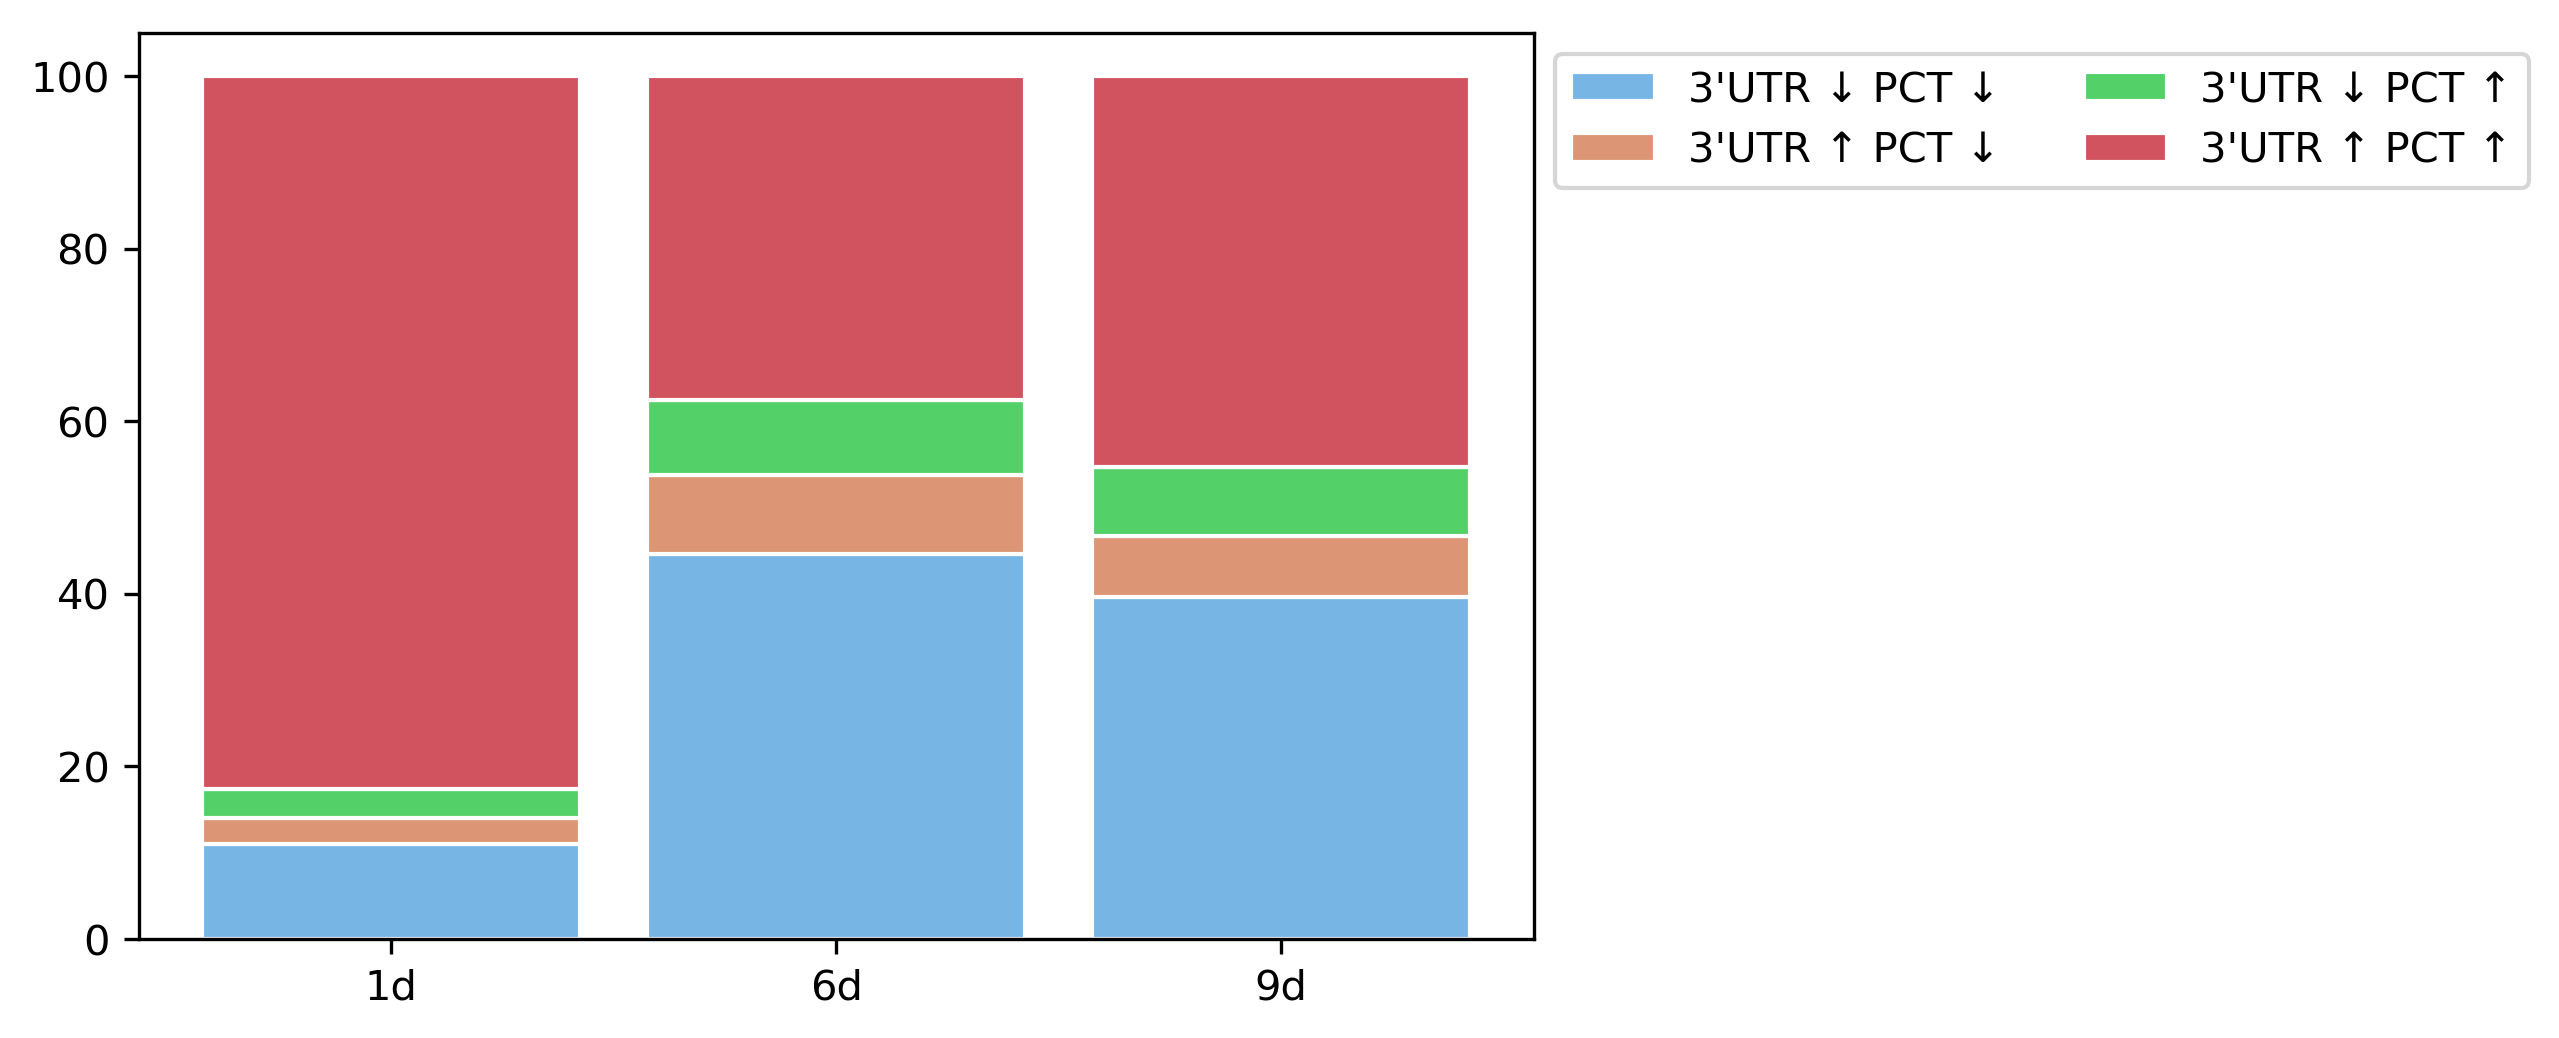

In [126]:
# plot
plt.figure(dpi=300)
barWidth = 0.85
names = ('1d','6d','9d')
# Create green Bars
plt.bar(r, blueBars, color='#77b5e5', edgecolor='white', width=barWidth, label="3'UTR ↓ PCT ↓")
# Create orange Bars
plt.bar(r, orangeBars, bottom=blueBars, color='#dd9675', edgecolor='white', width=barWidth, label="3'UTR ↑ PCT ↓")
# Create blue Bars
plt.bar(r, greenBars, bottom=[i+j for i,j in zip(blueBars, orangeBars)], color='#53d168', edgecolor='white', width=barWidth, label="3'UTR ↓ PCT ↑")
# Create red Bars
plt.bar(r, redBars, bottom=[i+j+k for i,j,k in zip(blueBars, orangeBars, greenBars)], color='#d15360', edgecolor='white', width=barWidth, label="3'UTR ↑ PCT ↑")

# Custom x axis
plt.xticks(r, names)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)

# ///// END

# BEGIN //// wyliczenie deseq dla PBS_UTR vs PBS_PROT

In [3]:
UTR = pd.read_csv(path+'mRNA_only_merged_w_XP.csv')
UTR.head(1)

,query,al_title,al_accession,evalue,coverage,Entry,Protein names,Gene names
0,TRINITY_DN100004_c4_g2_i2,gi|929290304|ref|XM_014166828.1| PREDICTED: Sa...,XM_014166828,0.0,100.183824,A0A1S3P3U9,forkhead box protein P4-like isoform X8,LOC106583051


In [4]:
UTR = UTR[['query', 'Entry']]
UTR.head(1)

,query,Entry
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9


In [5]:
UTR.rename(columns={'query':'trinity'}, inplace=True)

In [6]:
UTR.head(1)

,trinity,Entry
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9


In [7]:
matryca_novel = pd.read_csv(path+'PBS1d_MC_all_matryca.csv')
matryca_novel.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,MC_6d_1,MC_6d_2,MC_6d_3,MC_9d_1,MC_9d_2,MC_9d_3
0,TRINITY_DN100003_c1_g1_i1,8,16,29,1,24,21,24,1,1,2,7,2,34
1,TRINITY_DN100004_c4_g2_i2,9,22,24,8,23,50,45,65,53,95,76,29,74
2,TRINITY_DN100005_c7_g2_i1,800,798,577,913,1322,1276,1285,6952,5736,4279,6616,4073,3119
3,TRINITY_DN100005_c8_g3_i1,101,102,92,248,52,56,71,89,189,138,313,327,278
4,TRINITY_DN100005_c9_g1_i1,19,4,22,4,2,2,1,0,1,0,2,6,18


In [8]:
matryca_novel.shape

(188998, 14)

In [9]:
matryca_w_entry = pd.merge(UTR, matryca_novel, on='trinity', how='inner')
matryca_w_entry.head()

,trinity,Entry,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,MC_6d_1,MC_6d_2,MC_6d_3,MC_9d_1,MC_9d_2,MC_9d_3
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9,9,22,24,8,23,50,45,65,53,95,76,29,74
1,TRINITY_DN100005_c7_g2_i1,A0A1S3SUX9,800,798,577,913,1322,1276,1285,6952,5736,4279,6616,4073,3119
2,TRINITY_DN81030_c8_g4_i1,A0A1S3SUX9,47,44,18,47,62,74,62,335,306,196,292,162,121
3,TRINITY_DN83202_c8_g4_i2,A0A1S3SUX9,35,21,30,30,13,28,32,8,6,13,21,15,38
4,TRINITY_DN105298_c5_g1_i2,A0A1S3SUX9,23,15,19,25,7,12,10,1,13,8,22,8,13


In [10]:
matryca_w_entry.shape #mamy tu tylko trinity zidentyfikowane jako mRNA bialka (UTR)

(93208, 15)

In [11]:
matryca_w_entry.columns = [str(col) + '_UTR' for col in matryca_w_entry.columns]

In [12]:
matryca_w_entry.rename(columns={'Entry_UTR':'Entry', 'trinity_UTR':'id_UTR'}, inplace=True)

In [13]:
matryca_w_entry.head()

,id_UTR,Entry,PBS_1d_1_UTR,PBS_1d_2_UTR,PBS_1d_3_UTR,PBS_1d_4_UTR,MC_1d_1_UTR,MC_1d_2_UTR,MC_1d_3_UTR,MC_6d_1_UTR,MC_6d_2_UTR,MC_6d_3_UTR,MC_9d_1_UTR,MC_9d_2_UTR,MC_9d_3_UTR
0,TRINITY_DN100004_c4_g2_i2,A0A1S3P3U9,9,22,24,8,23,50,45,65,53,95,76,29,74
1,TRINITY_DN100005_c7_g2_i1,A0A1S3SUX9,800,798,577,913,1322,1276,1285,6952,5736,4279,6616,4073,3119
2,TRINITY_DN81030_c8_g4_i1,A0A1S3SUX9,47,44,18,47,62,74,62,335,306,196,292,162,121
3,TRINITY_DN83202_c8_g4_i2,A0A1S3SUX9,35,21,30,30,13,28,32,8,6,13,21,15,38
4,TRINITY_DN105298_c5_g1_i2,A0A1S3SUX9,23,15,19,25,7,12,10,1,13,8,22,8,13


## BIAŁKA PROT

In [15]:
# BIALKA:

salmo_rep_with_annot = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/1_code/report_salmo_annot_feature_map_salmo_proteins_xp01.csv', sep='\t', low_memory=False)

In [16]:
salmo_rep_with_annot.head()

,id,ident
0,TRINITY_DN100000_c5_g1,XP_013978521.1
1,TRINITY_DN100000_c5_g1_i2,XP_014024532.1
2,TRINITY_DN100000_c5_g1_i6,XP_013978521.1
3,TRINITY_DN100000_c9_g1,NaN
4,TRINITY_DN100000_c9_g1_i1,NaN


In [17]:
salmo_rep_with_annot.shape

(332030, 2)

In [18]:
salmo_rep_with_annot.dropna(inplace=True)
salmo_rep_with_annot.shape

(257125, 2)

In [19]:
salmo_rep_with_annot.head()

,id,ident
0,TRINITY_DN100000_c5_g1,XP_013978521.1
1,TRINITY_DN100000_c5_g1_i2,XP_014024532.1
2,TRINITY_DN100000_c5_g1_i6,XP_013978521.1
7,TRINITY_DN100001_c2_g2,XP_014027367.1
8,TRINITY_DN100001_c2_g2_i2,XP_014027367.1


In [20]:
salmo_rep_with_annot.dtypes

id       object
ident    object
dtype: object

In [52]:
salmo_rep_with_annot['ident'].to_csv(path+'xp_to_uniref.txt', index=False)

In [23]:
# zawiera wszystkie bialka zidentyfikowane przez trinotate i przypisane im Entry z uniprota

uniref_from_trinotate = pd.read_csv(prot_path+'uniprot-yourlist-xp_to_uniref.tab', sep='\t')
uniref_from_trinotate.head()

,Entry,ident,Entry name,Status,Protein names,Gene names,Organism,Length
0,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758
1,A0A1S3PAG0,XP_014024532.1,A0A1S3PAG0_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106584141,Salmo salar (Atlantic salmon),754
2,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333
3,B5X212,XP_014027367.1,CIO1B_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1b,Salmo salar (Atlantic salmon),333
4,A0A1S3NJU9,XP_014015694.1,A0A1S3NJU9_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106579887 CIAO1,Salmo salar (Atlantic salmon),330


In [112]:
#salmo_rep_with_annot_split = pd.DataFrame(salmo_rep_with_annot['ident'].str.split('^').tolist(), index=salmo_rep_with_annot.id).stack()
#salmo_rep_with_annot_split = salmo_rep_with_annot_split.reset_index([0, 'id'])
#salmo_rep_with_annot_split

In [113]:
#uniref_from_trinotate_entry_indent = uniref_from_trinotate[['Entry', 'ident']]
#uniref_from_trinotate_entry_indent.head()

In [24]:
salmo_rep_with_annot_w_entry = pd.merge(uniref_from_trinotate, salmo_rep_with_annot, on='ident', how='inner')
salmo_rep_with_annot_w_entry.head()

,Entry,ident,Entry name,Status,Protein names,Gene names,Organism,Length,id
0,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758,TRINITY_DN100000_c5_g1
1,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758,TRINITY_DN100000_c5_g1_i6
2,A0A1S3PAG0,XP_014024532.1,A0A1S3PAG0_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106584141,Salmo salar (Atlantic salmon),754,TRINITY_DN100000_c5_g1_i2
3,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333,TRINITY_DN100001_c2_g2
4,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333,TRINITY_DN100001_c2_g2_i2


In [25]:
salmo_rep_with_annot_w_entry.shape

(429071, 9)

In [22]:
salmo_rep_with_annot_w_entry.to_csv(prot_path+'PROT_wszystkie_bialka_z_raportu_trinity.csv', index=False)

In [26]:
prot_path = '/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/proteins_salmo/'
proteins_matryca = pd.read_csv(prot_path+'PBS_MCLR_salmo_only_matryca.csv')
proteins_matryca.head()

,trinity,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,MC_6d_1,MC_6d_2,MC_6d_3,MC_9d_1,MC_9d_2,MC_9d_3
0,TRINITY_DN100000_c5_g1_i2,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0,0,0,5,0,0
1,TRINITY_DN100000_c5_g1_i6,374.0,506.0,607.0,594.0,511.0,726.0,517.0,192,195,227,427,219,339
2,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1730,1743,1974,2315,2067,2386
3,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,402.0,471.0,420.0,1378,1338,1428,1291,1139,1344
4,TRINITY_DN100001_c2_g3_i3,565.0,525.0,384.0,406.0,555.0,552.0,529.0,1553,1461,1684,1436,1416,1447


In [25]:
proteins_matryca.shape

(148647, 14)

In [27]:
proteins_matryca.rename(columns={'trinity':'id'}, inplace=True)

In [28]:
proteins_matryca_w_entry = pd.merge(proteins_matryca, salmo_rep_with_annot_w_entry, on='id', how='inner')
proteins_matryca_w_entry.drop_duplicates(inplace=True)
proteins_matryca_w_entry.shape

(149296, 22)

In [96]:
#proteins_matryca_w_entry.to_csv(path+'test.csv')

In [29]:
test_if_merged_correctly = proteins_matryca_w_entry[~proteins_matryca_w_entry['id'].isin(proteins_matryca['id'])]
test_if_merged_correctly.shape


(0, 22)

In [98]:
#del proteins_matryca_w_entry['id']
#del proteins_matryca_w_entry['ident']

In [30]:
proteins_matryca_w_entry.columns = [str(col) + '_PROT' for col in proteins_matryca_w_entry.columns]

In [31]:
proteins_matryca_w_entry.rename(columns={'Entry_PROT':'Entry'}, inplace=True)

In [32]:
proteins_matryca_w_entry.head()

,id_PROT,PBS_1d_1_PROT,PBS_1d_2_PROT,PBS_1d_3_PROT,PBS_1d_4_PROT,MC_1d_1_PROT,MC_1d_2_PROT,MC_1d_3_PROT,MC_6d_1_PROT,MC_6d_2_PROT,...,MC_9d_2_PROT,MC_9d_3_PROT,Entry,ident_PROT,Entry name_PROT,Status_PROT,Protein names_PROT,Gene names_PROT,Organism_PROT,Length_PROT
0,TRINITY_DN100000_c5_g1_i2,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0,0,...,0,0,A0A1S3PAG0,XP_014024532.1,A0A1S3PAG0_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106584141,Salmo salar (Atlantic salmon),754
1,TRINITY_DN100000_c5_g1_i6,374.0,506.0,607.0,594.0,511.0,726.0,517.0,192,195,...,219,339,A0A1S3KIG4,XP_013978521.1,A0A1S3KIG4_SALSA,unreviewed,carboxyl-terminal PDZ ligand of neuronal nitri...,LOC106560293,Salmo salar (Atlantic salmon),758
2,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1730,1743,...,2067,2386,A0A1S3PIA6,XP_014027367.1,A0A1S3PIA6_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106585549 CIAO1,Salmo salar (Atlantic salmon),333
3,TRINITY_DN100001_c2_g2_i2,1232.0,1264.0,998.0,1040.0,1162.0,1784.0,938.0,1730,1743,...,2067,2386,B5X212,XP_014027367.1,CIO1B_SALSA,reviewed,Probable cytosolic iron-sulfur protein assembl...,ciao1b,Salmo salar (Atlantic salmon),333
4,TRINITY_DN100001_c2_g2_i7,562.0,408.0,311.0,353.0,402.0,471.0,420.0,1378,1338,...,1139,1344,A0A1S3NJU9,XP_014015694.1,A0A1S3NJU9_SALSA,unreviewed,Probable cytosolic iron-sulfur protein assembl...,LOC106579887 CIAO1,Salmo salar (Atlantic salmon),330


In [34]:
matryca_w_entry.shape #UTR

(93208, 15)

In [35]:
proteins_matryca_w_entry.shape #PROT

(149296, 22)

In [33]:
# do UTR dodac PROT

merged_UTR_PROT_matryca = pd.merge(matryca_w_entry, proteins_matryca_w_entry, on="Entry", how='inner')
#merged.to_csv(path+'matryca_UTR_PROT_entry_only.csv', index=False)

In [34]:
merged_UTR_PROT_matryca.columns

Index(['id_UTR', 'Entry', 'PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR',
       'PBS_1d_4_UTR', 'MC_1d_1_UTR', 'MC_1d_2_UTR', 'MC_1d_3_UTR',
       'MC_6d_1_UTR', 'MC_6d_2_UTR', 'MC_6d_3_UTR', 'MC_9d_1_UTR',
       'MC_9d_2_UTR', 'MC_9d_3_UTR', 'id_PROT', 'PBS_1d_1_PROT',
       'PBS_1d_2_PROT', 'PBS_1d_3_PROT', 'PBS_1d_4_PROT', 'MC_1d_1_PROT',
       'MC_1d_2_PROT', 'MC_1d_3_PROT', 'MC_6d_1_PROT', 'MC_6d_2_PROT',
       'MC_6d_3_PROT', 'MC_9d_1_PROT', 'MC_9d_2_PROT', 'MC_9d_3_PROT',
       'ident_PROT', 'Entry name_PROT', 'Status_PROT', 'Protein names_PROT',
       'Gene names_PROT', 'Organism_PROT', 'Length_PROT'],
      dtype='object')

In [35]:
day_1_matryca = merged_UTR_PROT_matryca[['PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR', 'PBS_1d_4_UTR',
                                         'PBS_1d_1_PROT', 'PBS_1d_2_PROT', 'PBS_1d_3_PROT', 'PBS_1d_4_PROT',]]

day_1_matryca.to_csv(path+'day_1_PBS_UTR_PROT_matryca.csv', index=False)

# na podstawie powyzszego ^^ robiebie deseq2

In [38]:
# ponizej wczytuje wyniki deseq i dodaje do nich kolumny z merged_UTR_PROT_matryca

deseq_day_1_results = pd.read_csv(path+'deseq2_result_from_R_1d_PBS_UTR_PBS_PROT.csv')

In [39]:
merged_UTR_PROT_matryca.shape

(295223, 36)

In [40]:
deseq_day_1_results.shape

(295223, 6)

In [41]:
deseq_day_1_results_w_all_details = pd.merge(deseq_day_1_results, merged_UTR_PROT_matryca, left_index=True, right_index=True)
deseq_day_1_results_w_all_details.shape

(295223, 42)

In [47]:
deseq_day_1_results_w_all_details = deseq_day_1_results_w_all_details[['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
       'Entry', 'PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR', 'PBS_1d_4_UTR',
       'id_UTR', 'id_PROT', 'PBS_1d_1_PROT', 'PBS_1d_2_PROT',
       'PBS_1d_3_PROT', 'PBS_1d_4_PROT',
       'ident_PROT', 'Entry name_PROT', 'Status_PROT', 'Protein names_PROT',
       'Gene names_PROT', 'Organism_PROT', 'Length_PROT']]

In [48]:
deseq_day_1_results_w_all_details = deseq_day_1_results_w_all_details[deseq_day_1_results_w_all_details['padj'] < 0.001]

In [49]:
deseq_day_1_results_w_all_details.sort_values(by='log2FoldChange', inplace=True)

In [50]:
deseq_day_1_results_w_all_details.to_csv(path+'PBS_UTR_vs_PBS_PROT_1d_deseq_w_names.csv')

In [3]:
#load deseq results of UTR vs PROT in PBS only. This is normal state of those transcripts
deseqPBS_UTRvsPROT = pd.read_csv(path+'PBS_UTR_vs_PBS_PROT_1d_deseq_w_names.csv')

In [5]:
deseqPBS_UTRvsPROT.columns

Index(['Unnamed: 0', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'Entry', 'PBS_1d_1_UTR', 'PBS_1d_2_UTR', 'PBS_1d_3_UTR',
       'PBS_1d_4_UTR', 'id_UTR', 'id_PROT', 'PBS_1d_1_PROT', 'PBS_1d_2_PROT',
       'PBS_1d_3_PROT', 'PBS_1d_4_PROT', 'ident_PROT', 'Entry name_PROT',
       'Status_PROT', 'Protein names_PROT', 'Gene names_PROT', 'Organism_PROT',
       'Length_PROT'],
      dtype='object')

In [6]:
#load deseq results of UTR DOWN transcripts changed after MCLR (PBSvsMCLR) 
#deseqMCLR_UTR_DOWN_PROT_DOWN = pd.read_csv(path+'PROPER_UTR_DOWN_PROT_DOWN_D1.csv')
#deseqMCLR_UTR_DOWN_PROT_UP = pd.read_csv(path+'PROPER_UTR_DOWN_PROT_UP_D1.csv')

In [11]:
deseqPBS_UTRvsPROT[deseqPBS_UTRvsPROT['log2FoldChange'] > 1].shape # przewaga PROT

(85892, 25)

In [12]:
deseqPBS_UTRvsPROT[deseqPBS_UTRvsPROT['log2FoldChange'] < 1].shape # przewaga UTR

(74138, 25)